# Módulo 4 MOOC Python para Ciencia de Datos

Lo primero que realizamos para el desarrollo de las clases es importar los módulos necesarios para poder trabajar con la Base de Datos del Servicio de Salud.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.transforms as transforms
import seaborn as sns

### Clase 1: ¿Qué es, por qué es importante y cómo se modela la incertidumbre?

1. **¿Qué es la incertidumbre?**

Hay problemas de decisión para los que no se cuenta con información certera para tomar estas decisiones. Lo anterior se conoce como Incertidumbre, y se define como la falta de certeza o la imposibilidad de describir de manera exacta un determinado fenómeno. En pocas palabras, no sabemos con exactitud que va a suceder, podemos tener una intuición o expectativa, pero nunca la seguridad de que sucederá lo que esperamos. Es importante destacar que la variabilidad en los valores observados para un mismo fenómeno es lo que hace que exista incertidumbre en las realizaciones futuras de ese fenómeno.

2. **¿Por qué es importante la incertidumbre?**

Hay decisiones que se deben tomar con valores que se desprenden del análisis de datos pero que no se conocen con certeza, es decir, cuentan poseen incertidumbre debido a su variabilidad. Entonces, es importante dejar súper claro que la incertidumbre produce riesgo en los resultados de las decisiones que se deben toman, entendiendo riesgo como la posibilidad de que estos resultados no sean los esperados o no sean satisfactorios.
Esto obliga a tomar en cuenta esta falta de certeza, incorporando esta incertidumbre y variabilidad en los cálculos y valores obtenidos para tratar de acercarnos lo más posible a lo que puede suceder. Al realizar esto, las decisiones se toman con más y mejor información y pueden dar una mejor respuesta en el futuro. 

3. **¿Cómo se modela la incertidumbre?**

Debido a la importancia que tiene la incertidumbre para tomar decisiones, se debe encontrar una forma que permita modelarla adecuadamente. Para esto, lo primero es reconocer cuándo los datos presentan variabilidad e incertidumbre. 
Así, teniendo claro cuando existe incertidumbre en los datos que tenemos del fenómeno que estamos estudiando, debemos: (1) tratar de estimar los distintos valores que puede tomar la variable estudiada, (2) estimar la probabilidad de ocurrencia de cada valor que puede tomar esa variable y (3) estimar el impacto que genera esta incertidumbre en los resultados esperados. Estos pasos se ilustran y se explican en el ejemplo que se mostrará a continuación.

4. **Ejemplo**

Para el ejemplo, se importa el archivo Excel **Datos**, al cual se le agrega la *Sheet* `Clase 1`. En esta hoja se agrega una serie de tiempo, la cual muestra la cantidad de pacientes que llegan a cierta área de un hospital durante 10 días. A continuación, se importa el Excel

In [3]:
C1_sheet = pd.read_excel("C:/Users/Tomás Barrientos/Downloads/_Datos.xls", sheet_name = "Clase 1", header = 0, index_col = None)
C1_sheet

,Dia,Llegada
0,1,4
1,2,5
2,3,5
3,4,2
4,5,4
5,6,5
6,7,6
7,8,5
8,9,5
9,10,5


Luego, para entender las llegadas, se realiza un histograma y una tabla de frecuencia de las llegadas de la serie de tiempo. 

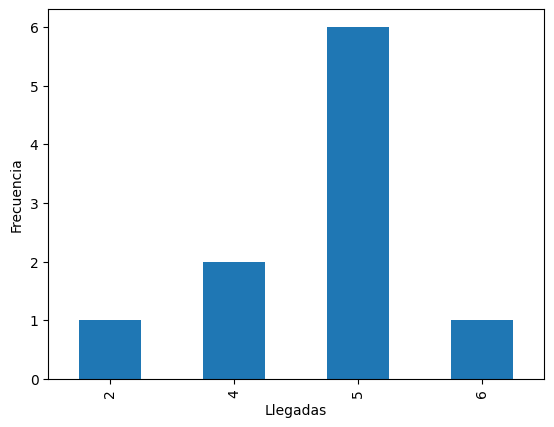

In [4]:
ax = C1_sheet.groupby("Llegada").count().plot(kind="bar")
plt.xlabel("Llegadas")
plt.ylabel("Frecuencia")
ax.get_legend().remove()
plt.show()

In [5]:
C1_sheet['Llegada'].value_counts(normalize = False, sort = True)

Llegada
5    6
4    2
2    1
6    1
Name: count, dtype: int64

In [6]:
C1_sheet['Llegada'].value_counts(normalize = True, sort = True)

Llegada
5    0.6
4    0.2
2    0.1
6    0.1
Name: proportion, dtype: float64

Por ejemplo, la tabla anterior nos permite ver que en el pasado que conocemos el 60% de las veces han llegado 5 pacientes. Así, y dado que poseemos solamente esa información, podríamos decir que la probabilidad de que lleguen 5 pacientes el día 11 será -basado en la evidencia de los datos analizados- de 20%.

Imaginemos que el hospital está vacío al final del día 10. A partir de esto, podríamos tomar la decisión de tener 5 camas disponibles para el día 11, dado que existe este 60% de probabilidad de que lleguen 5 pacientes. Pero ¿qué pasaría si llegan 6 pacientes, cuya probabilidad calculada de la misma manera es de 10%? En este caso, no tendríamos camas para atender a uno de estos pacientes. Bajo un análisis similar, si llegan 2 pacientes habrá 4 camas desocupadas. ¿Cuál de estas dos decisiones es mejor? Depende, ya que se debe evaluar el impacto de no atender al paciente que queda sin cama frente al impacto de tener 4 camas desocupadas.

**Pregunta 2**

Indiqué cuál de las siguientes alternativas corresponde al código en Python para calcular la cantidad de días en los que no llegaron 4 o 5 pacientes 

In [7]:
C1_sheet.loc[(C1_sheet["Llegada"] != 4) & (C1_sheet["Llegada"] !=5)].count()

Dia        2
Llegada    2
dtype: int64

### Clase 2: ¿Qué es la analítica descriptiva y predictiva?

1. **¿Qué es la analítica descriptiva?**

La analítica o análisis descriptivo es uno de los tres tipos de análisis de datos que podemos realizar. En esta, nos ocupamos de estudiar el pasado mediante los datos que han sido recopilados a lo largo del tiempo, es como tratar de sacar una foto con gran detalle de lo que ha pasado. Para realizar este tipo de análisis contamos con distintas herramientas que hemos aprendido a lo largo del Mooc, entre las que encontramos:
-	Tablas: Aspecto fundamental del análisis descriptivo que nos permite visualizar y contener los datos.
-	Estadísticas: Fundamental para describir los datos a través del cálculo de mínimos, máximos y promedios, para calcular desviaciones de la media y rangos, junto con agrupar los datos para entender que pasa de manera macro, entre otros aspectos fundamentales.
-	Gráficos: Se pueden realizar gráficos que resuman los datos, para lo cual contamos con distintos tipos que pueden ser útiles dependiendo de que se quiera mostrar. 

A manera de ejemplo y utilizando los conocimientos que han ganado a lo largo del curso, si usted quisiera realizar un análisis descriptivo de la Base da Datos del Sistema de Salud, específicamente de la hoja Hospitales, lo primero que debería realizar en Python es un DataFrame, lo que se muestra a continuación.


In [9]:
GRD_sheet = pd.read_excel("C:/Users/Tomás Barrientos/Downloads/_Datos.xls", sheet_name = "GRD", header = 0, index_col = None)
Hosp_sheet = pd.read_excel("C:/Users/Tomás Barrientos/Downloads/_Datos.xls", sheet_name = "Hospitales", header = 0, index_col = None)
Info_sheet = pd.read_excel("C:/Users/Tomás Barrientos/Downloads/_Datos.xls", sheet_name = "Información Histórica", header = 0, index_col = None)

In [8]:
Hosp_sheet.head(4)

,Nombre Servicio de Salud,Nombre Establecimiento,Área Cuidados Intensivos Adultos,Área Cuidados Intermedios Adulto,Total Camas Críticas,Máxima cantidad de camas a aumetar,Costo de instalar una cama [MM$],Costo de operación anual de una cama [MM$],Costo diario GRD1 [MM$],Costo diario GRD2 [MM$],Costo diario GRD3 [MM$],Costo diario GRD4 [MM$],Costo diario GRD5 [MM$],Costo diario GRD6 [MM$],Costo diario GRD7 [MM$],Costo diario GRD8 [MM$],Costo diario GRD9 [MM$],Costo diario GRD10 [MM$]
0,Metropolitano Norte ...,Complejo Hospitalario San José,11,33,44,10,1407,47.2,0.593,0.509,0.367,0.492,0.524,0.405,0.571,0.474,0.498,0.305
1,Metropolitano Occidente ...,Hospital Adalberto Steeger (Talagante),6,11,17,5,1263,62.1,0.493,0.357,0.429,0.382,0.469,0.386,0.543,0.362,0.564,0.333
2,Metropolitano Occidente ...,Hospital Dr. Félix Bulnes Cerda,3,6,9,5,1310,65.9,0.580,0.325,0.375,0.409,0.561,0.362,0.328,0.314,0.536,0.436
3,Metropolitano Occidente ...,Hospital San Juan de Dios,29,47,76,30,1066,39.2,0.482,0.554,0.564,0.331,0.438,0.509,0.544,0.410,0.441,0.359


Como se puede apreciar, la información que tenemos nos indica para cada hospital con cuántas camas de cuidados intensivos adulto, intermedio adultos y totales cuenta ese hospital. Además, tenemos la información de la cantidad máxima de camas que se pueden adicionar a cada hospital, el costo de realizar esa instalación y el costo de operación anual de una cama para cada hospital. Finalmente, tenemos la información sobre el costo diario de atención para cada tipo de GRD.

Así, podemos hacernos muchas preguntas para describir el estado actual del sistema. Por ejemplo, ¿cuál es el hospital que cuenta con menos camas críticas?, ¿cuántos servicios de salud tienen menos de 70 camas totales? ¿en qué hospitales hay más camas críticas que camas intermedias?, ¿cuál es el hospital con el menor costo diario de atención para cada GRD y cuál es este costo?, ¿cuál es el costo de operación anual de cama más bajo por servicio de salud?, ¿cuál es el hospital más caro en atención de GRDs, considerando el costo de atención generalizado como el promedio del costo de atención de todos los GRDs?, ¿cuál es el servicio de salud que presenta una mayor diferencia en costo de atención entre su GRD más caro y más barato de atender?, ¿cómo distribuye el costo anual de operación de una cama en la red?, entre muchas más preguntas que podríamos hacernos para entender cuál es la realidad actual de la Red de Salud de la Región Metropolitana.

Para dar respuesta a cada una de estas preguntas usaremos el Dataframe creado, e iremos detallando comandos y explicaciones que permitan entender por qué se realizar ese análisis específicamente.

1. ¿Cuál es el hospital que cuenta con menos camas críticas?

In [9]:
###Alternativa 1
alternativa_1 = Hosp_sheet.sort_values(by ='Total Camas Críticas')
alternativa_1.head(3)

,Nombre Servicio de Salud,Nombre Establecimiento,Área Cuidados Intensivos Adultos,Área Cuidados Intermedios Adulto,Total Camas Críticas,Máxima cantidad de camas a aumetar,Costo de instalar una cama [MM$],Costo de operación anual de una cama [MM$],Costo diario GRD1 [MM$],Costo diario GRD2 [MM$],Costo diario GRD3 [MM$],Costo diario GRD4 [MM$],Costo diario GRD5 [MM$],Costo diario GRD6 [MM$],Costo diario GRD7 [MM$],Costo diario GRD8 [MM$],Costo diario GRD9 [MM$],Costo diario GRD10 [MM$]
2,Metropolitano Occidente ...,Hospital Dr. Félix Bulnes Cerda,3,6,9,5,1310,65.9,0.580,0.325,0.375,0.409,0.561,0.362,0.328,0.314,0.536,0.436
20,Metropolitano Sur Oriente ...,Hospital Padre Alberto Hurtado (San Ramón),6,10,16,5,1166,43.2,0.479,0.579,0.387,0.509,0.571,0.516,0.584,0.382,0.462,0.424
16,Metropolitano Sur ...,Hospital Parroquial de San Bernardo,6,10,16,4,1051,47.0,0.541,0.546,0.533,0.411,0.534,0.466,0.313,0.500,0.523,0.310


In [10]:
###Alternativa 2
Hosp_sheet.loc[Hosp_sheet["Total Camas Críticas"]==Hosp_sheet["Total Camas Críticas"].min()]

,Nombre Servicio de Salud,Nombre Establecimiento,Área Cuidados Intensivos Adultos,Área Cuidados Intermedios Adulto,Total Camas Críticas,Máxima cantidad de camas a aumetar,Costo de instalar una cama [MM$],Costo de operación anual de una cama [MM$],Costo diario GRD1 [MM$],Costo diario GRD2 [MM$],Costo diario GRD3 [MM$],Costo diario GRD4 [MM$],Costo diario GRD5 [MM$],Costo diario GRD6 [MM$],Costo diario GRD7 [MM$],Costo diario GRD8 [MM$],Costo diario GRD9 [MM$],Costo diario GRD10 [MM$]
2,Metropolitano Occidente ...,Hospital Dr. Félix Bulnes Cerda,3,6,9,5,1310,65.9,0.58,0.325,0.375,0.409,0.561,0.362,0.328,0.314,0.536,0.436


2.	¿Cuántos servicios de salud tienen menos de 70 camas totales?

In [11]:
p2 = Hosp_sheet[["Nombre Servicio de Salud", "Total Camas Críticas"]].groupby("Nombre Servicio de Salud").sum()
p2.loc[p2["Total Camas Críticas"]<70]

,Total Camas Críticas
Nombre Servicio de Salud,
Metropolitano Norte,44


3.	¿En qué hospitales hay más camas críticas que camas intermedias?

In [12]:
p3 = Hosp_sheet[["Nombre Establecimiento", "Área Cuidados Intensivos Adultos","Área Cuidados Intermedios Adulto"]]
p3["Resultado"] = np.where(p3["Área Cuidados Intermedios Adulto"] < p3["Área Cuidados Intensivos Adultos"],1,0)
p3.head(7)

/var/folders/f_/whlwgkc138bgbjytc0p_vknr0000gn/T/ipykernel_16417/1696202995.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p3["Resultado"] = np.where(p3["Área Cuidados Intermedios Adulto"] < p3["Área Cuidados Intensivos Adultos"],1,0)


,Nombre Establecimiento,Área Cuidados Intensivos Adultos,Área Cuidados Intermedios Adulto,Resultado
0,Complejo Hospitalario San José,11,33,0
1,Hospital Adalberto Steeger (Talagante),6,11,0
2,Hospital Dr. Félix Bulnes Cerda,3,6,0
3,Hospital San Juan de Dios,29,47,0
4,Instituto Traumatológico Dr. Teodoro Gebauer,12,6,1
5,Hospital Clínico San Borja-Arriarán,17,26,0
6,Hospital de Urgencia Asistencia Pública Dr. Al...,24,20,1


In [13]:
p3.loc[p3["Resultado"] == 1]

,Nombre Establecimiento,Área Cuidados Intensivos Adultos,Área Cuidados Intermedios Adulto,Resultado
4,Instituto Traumatológico Dr. Teodoro Gebauer,12,6,1
6,Hospital de Urgencia Asistencia Pública Dr. Al...,24,20,1
10,Instituto de Neurocirugía Dr. Alfonso Asenjo,12,11,1
13,Hospital de Enfermedades Infecciosas Dr. Lucio...,11,9,1
14,Hospital Dr. Exequiel González Cortés,23,8,1


4.	¿Cuál es el hospital con el menor costo diario de atención para cada GRD y cuál es este costo?

In [14]:
Hosp_sheet = Hosp_sheet.rename(columns={"Costo diario GRD1 [MM$]": "Cost_GRD1","Costo diario GRD2 [MM$]": "Cost_GRD2","Costo diario GRD3 [MM$]": "Cost_GRD3","Costo diario GRD4 [MM$]": "Cost_GRD4","Costo diario GRD5 [MM$]": "Cost_GRD5","Costo diario GRD6 [MM$]": "Cost_GRD6","Costo diario GRD7 [MM$]": "Cost_GRD7","Costo diario GRD8 [MM$]": "Cost_GRD8","Costo diario GRD9 [MM$]": "Cost_GRD9","Costo diario GRD10 [MM$]": "Cost_GRD10"})
Cost_GRD = Hosp_sheet[["Nombre Servicio de Salud","Nombre Establecimiento","Cost_GRD1","Cost_GRD2","Cost_GRD3","Cost_GRD4","Cost_GRD5","Cost_GRD6","Cost_GRD7","Cost_GRD8","Cost_GRD9","Cost_GRD10"]]
Cost_GRD.head()

,Nombre Servicio de Salud,Nombre Establecimiento,Cost_GRD1,Cost_GRD2,Cost_GRD3,Cost_GRD4,Cost_GRD5,Cost_GRD6,Cost_GRD7,Cost_GRD8,Cost_GRD9,Cost_GRD10
0,Metropolitano Norte ...,Complejo Hospitalario San José,0.593,0.509,0.367,0.492,0.524,0.405,0.571,0.474,0.498,0.305
1,Metropolitano Occidente ...,Hospital Adalberto Steeger (Talagante),0.493,0.357,0.429,0.382,0.469,0.386,0.543,0.362,0.564,0.333
2,Metropolitano Occidente ...,Hospital Dr. Félix Bulnes Cerda,0.580,0.325,0.375,0.409,0.561,0.362,0.328,0.314,0.536,0.436
3,Metropolitano Occidente ...,Hospital San Juan de Dios,0.482,0.554,0.564,0.331,0.438,0.509,0.544,0.410,0.441,0.359
4,Metropolitano Occidente ...,Instituto Traumatológico Dr. Teodoro Gebauer,0.407,0.449,0.468,0.433,0.573,0.392,0.409,0.391,0.418,0.334


In [15]:
Cost_GRD.loc[Cost_GRD["Cost_GRD1"] == Cost_GRD["Cost_GRD1"].min()]

,Nombre Servicio de Salud,Nombre Establecimiento,Cost_GRD1,Cost_GRD2,Cost_GRD3,Cost_GRD4,Cost_GRD5,Cost_GRD6,Cost_GRD7,Cost_GRD8,Cost_GRD9,Cost_GRD10
10,Metropolitano Oriente ...,Instituto de Neurocirugía Dr. Alfonso Asenjo,0.376,0.481,0.476,0.407,0.573,0.302,0.535,0.52,0.407,0.42


In [16]:
Cost_GRD.loc[Cost_GRD["Cost_GRD2"] == Cost_GRD["Cost_GRD2"].min()]

,Nombre Servicio de Salud,Nombre Establecimiento,Cost_GRD1,Cost_GRD2,Cost_GRD3,Cost_GRD4,Cost_GRD5,Cost_GRD6,Cost_GRD7,Cost_GRD8,Cost_GRD9,Cost_GRD10
2,Metropolitano Occidente ...,Hospital Dr. Félix Bulnes Cerda,0.58,0.325,0.375,0.409,0.561,0.362,0.328,0.314,0.536,0.436


In [17]:
Cost_GRD.loc[Cost_GRD["Cost_GRD3"] == Cost_GRD["Cost_GRD3"].min()]

,Nombre Servicio de Salud,Nombre Establecimiento,Cost_GRD1,Cost_GRD2,Cost_GRD3,Cost_GRD4,Cost_GRD5,Cost_GRD6,Cost_GRD7,Cost_GRD8,Cost_GRD9,Cost_GRD10
6,Metropolitano Central ...,Hospital de Urgencia Asistencia Pública Dr. Al...,0.468,0.509,0.343,0.391,0.39,0.404,0.457,0.411,0.33,0.568


In [18]:
Cost_GRD.loc[Cost_GRD["Cost_GRD4"] == Cost_GRD["Cost_GRD4"].min()]

,Nombre Servicio de Salud,Nombre Establecimiento,Cost_GRD1,Cost_GRD2,Cost_GRD3,Cost_GRD4,Cost_GRD5,Cost_GRD6,Cost_GRD7,Cost_GRD8,Cost_GRD9,Cost_GRD10
9,Metropolitano Oriente ...,Hospital Dr. Luis Tisné B.,0.386,0.477,0.491,0.312,0.452,0.362,0.435,0.305,0.482,0.421


In [19]:
Cost_GRD.loc[Cost_GRD["Cost_GRD5"] == Cost_GRD["Cost_GRD5"].min()]

,Nombre Servicio de Salud,Nombre Establecimiento,Cost_GRD1,Cost_GRD2,Cost_GRD3,Cost_GRD4,Cost_GRD5,Cost_GRD6,Cost_GRD7,Cost_GRD8,Cost_GRD9,Cost_GRD10
18,Metropolitano Sur Oriente ...,Hospital Clínico de la Florida,0.527,0.552,0.431,0.594,0.331,0.341,0.58,0.528,0.537,0.505


In [20]:
Cost_GRD.loc[Cost_GRD["Cost_GRD6"] == Cost_GRD["Cost_GRD6"].min()]

,Nombre Servicio de Salud,Nombre Establecimiento,Cost_GRD1,Cost_GRD2,Cost_GRD3,Cost_GRD4,Cost_GRD5,Cost_GRD6,Cost_GRD7,Cost_GRD8,Cost_GRD9,Cost_GRD10
10,Metropolitano Oriente ...,Instituto de Neurocirugía Dr. Alfonso Asenjo,0.376,0.481,0.476,0.407,0.573,0.302,0.535,0.52,0.407,0.42


In [21]:
Cost_GRD.loc[Cost_GRD["Cost_GRD7"] == Cost_GRD["Cost_GRD7"].min()]

,Nombre Servicio de Salud,Nombre Establecimiento,Cost_GRD1,Cost_GRD2,Cost_GRD3,Cost_GRD4,Cost_GRD5,Cost_GRD6,Cost_GRD7,Cost_GRD8,Cost_GRD9,Cost_GRD10
7,Metropolitano Central ...,Hospital el Carmen,0.444,0.439,0.386,0.569,0.404,0.416,0.302,0.414,0.494,0.425
11,Metropolitano Oriente ...,Instituto Nacional de Enfermedades Respiratori...,0.498,0.465,0.482,0.512,0.597,0.390,0.302,0.566,0.428,0.439


In [22]:
Cost_GRD.loc[Cost_GRD["Cost_GRD8"] == Cost_GRD["Cost_GRD8"].min()]

,Nombre Servicio de Salud,Nombre Establecimiento,Cost_GRD1,Cost_GRD2,Cost_GRD3,Cost_GRD4,Cost_GRD5,Cost_GRD6,Cost_GRD7,Cost_GRD8,Cost_GRD9,Cost_GRD10
9,Metropolitano Oriente ...,Hospital Dr. Luis Tisné B.,0.386,0.477,0.491,0.312,0.452,0.362,0.435,0.305,0.482,0.421


In [23]:
Cost_GRD.loc[Cost_GRD["Cost_GRD9"] == Cost_GRD["Cost_GRD9"].min()]

,Nombre Servicio de Salud,Nombre Establecimiento,Cost_GRD1,Cost_GRD2,Cost_GRD3,Cost_GRD4,Cost_GRD5,Cost_GRD6,Cost_GRD7,Cost_GRD8,Cost_GRD9,Cost_GRD10
5,Metropolitano Central ...,Hospital Clínico San Borja-Arriarán,0.509,0.363,0.575,0.534,0.367,0.567,0.576,0.482,0.32,0.574


In [24]:
Cost_GRD.loc[Cost_GRD["Cost_GRD10"] == Cost_GRD["Cost_GRD10"].min()]

,Nombre Servicio de Salud,Nombre Establecimiento,Cost_GRD1,Cost_GRD2,Cost_GRD3,Cost_GRD4,Cost_GRD5,Cost_GRD6,Cost_GRD7,Cost_GRD8,Cost_GRD9,Cost_GRD10
0,Metropolitano Norte ...,Complejo Hospitalario San José,0.593,0.509,0.367,0.492,0.524,0.405,0.571,0.474,0.498,0.305


5.	¿Cuál es el costo de operación anual de cama más bajo por servicio de salud?

In [25]:
p5 = Hosp_sheet[["Nombre Servicio de Salud", "Costo de operación anual de una cama [MM$]"]].groupby("Nombre Servicio de Salud").min()
p5

,Costo de operación anual de una cama [MM$]
Nombre Servicio de Salud,
Metropolitano Central,44.5
Metropolitano Norte,47.2
Metropolitano Occidente,39.2
Metropolitano Oriente,36.6
Metropolitano Sur,42.9
Metropolitano Sur Oriente,40.6


6.	¿Cuál es el hospital más caro en atención de GRDs, considerando el costo de atención generalizado como el promedio del costo de atención de todos los GRDs?

In [26]:
Cost_GRD["Mean_cost"] = Cost_GRD.apply(lambda row: (row.Cost_GRD1+row.Cost_GRD2+row.Cost_GRD3+row.Cost_GRD4+row.Cost_GRD5+row.Cost_GRD6+row.Cost_GRD7+row.Cost_GRD8+row.Cost_GRD9+row.Cost_GRD10)/10, axis = 1)
Cost_GRD[["Nombre Establecimiento", "Mean_cost"]].head(2)

/var/folders/f_/whlwgkc138bgbjytc0p_vknr0000gn/T/ipykernel_16417/327345377.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Cost_GRD["Mean_cost"] = Cost_GRD.apply(lambda row: (row.Cost_GRD1+row.Cost_GRD2+row.Cost_GRD3+row.Cost_GRD4+row.Cost_GRD5+row.Cost_GRD6+row.Cost_GRD7+row.Cost_GRD8+row.Cost_GRD9+row.Cost_GRD10)/10, axis = 1)


,Nombre Establecimiento,Mean_cost
0,Complejo Hospitalario San José,0.4738
1,Hospital Adalberto Steeger (Talagante),0.4318


In [27]:
Cost_GRD[["Nombre Establecimiento", "Mean_cost"]].loc[Cost_GRD["Mean_cost"] == Cost_GRD["Mean_cost"].max()]

,Nombre Establecimiento,Mean_cost
15,Hospital El Pino,0.5275


7.	¿Cuál es el servicio de salud que presenta una mayor diferencia en costo de atención entre su GRD más caro y barato de atender?

In [28]:
Cost_GRD_min = Cost_GRD[["Nombre Servicio de Salud","Nombre Establecimiento","Cost_GRD1","Cost_GRD2","Cost_GRD3","Cost_GRD4","Cost_GRD5","Cost_GRD6","Cost_GRD7","Cost_GRD8","Cost_GRD9","Cost_GRD10"]].groupby("Nombre Servicio de Salud").min()
Cost_GRD_max = Cost_GRD[["Nombre Servicio de Salud","Nombre Establecimiento","Cost_GRD1","Cost_GRD2","Cost_GRD3","Cost_GRD4","Cost_GRD5","Cost_GRD6","Cost_GRD7","Cost_GRD8","Cost_GRD9","Cost_GRD10"]].groupby("Nombre Servicio de Salud").max()

In [29]:
Cost_GRD_max.max(axis = 1) - Cost_GRD_min.min(axis = 1)

/var/folders/f_/whlwgkc138bgbjytc0p_vknr0000gn/T/ipykernel_16417/489443565.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  Cost_GRD_max.max(axis = 1) - Cost_GRD_min.min(axis = 1)


Nombre Servicio de Salud
Metropolitano Central                                 0.274
Metropolitano Norte                                   0.288
Metropolitano Occidente                               0.266
Metropolitano Oriente                                 0.295
Metropolitano Sur                                     0.293
Metropolitano Sur Oriente                             0.264
dtype: float64

8.	¿Cómo distribuye el costo anual de operación de una cama en la red?

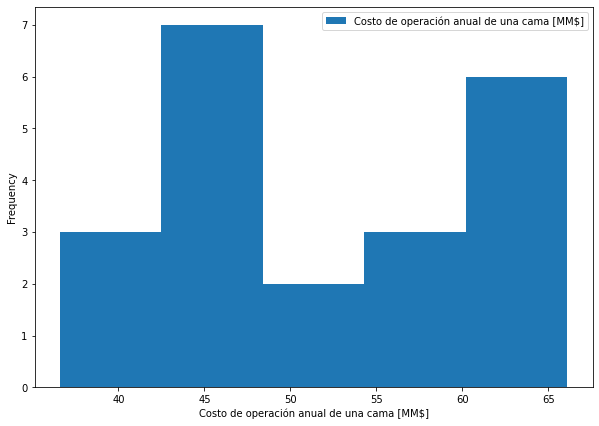

In [30]:
###histograma
Hosp_sheet.plot(kind = "hist", bins = 5, y = "Costo de operación anual de una cama [MM$]", figsize = (10,7))
plt.xlabel("Costo de operación anual de una cama [MM$]")
plt.show()

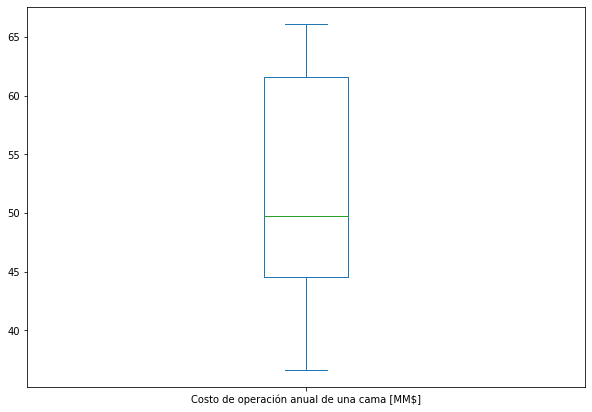

In [31]:
###boxplot
Hosp_sheet[["Costo de operación anual de una cama [MM$]"]].plot(kind = "box", figsize = (10,7))
plt.show()

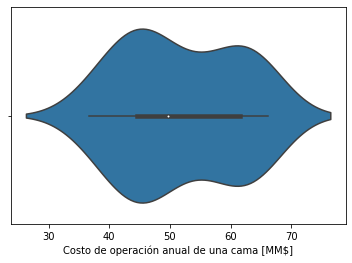

In [32]:
##violinplot
sns.violinplot(x = Hosp_sheet["Costo de operación anual de una cama [MM$]"])
plt.show()

2. **¿Qué es la analítica predictiva?**

La analítica o análisis predictivo es el segundo tipo de análisis de datos que podemos realizar. Como su nombre lo indica, este tipo de análisis utiliza distintos tipos de modelos que nos permitan predecir lo que puede suceder en el futuro a partir de los datos con que se cuenta. Para esto, se debe definir que es lo que se desea predecir y que datos utilizar para predecir dicha variable. Luego, a través de herramientas matemáticas o probabilísticas se busca encontrar patrones, modelos o tendencias que permitan estimar de buena manera el futuro.

Para mostrar en que consiste el análisis de datos predictivo, se realizará un ejemplo. Imagínese que usted esta encargado de ver las llegadas de los pacientes del GRD1 a partir de la información histórica contenida en la Base de Datos del Sistema de Salud y debe estimar cuantos pacientes pueden llegar un día a partir de los datos. Para esto, lo primero que debe hacer es seleccionar todos los datos de los pacientes con GRD1 y luego agrupar por día de llegada para tener cuantos llegan en total por día.


In [33]:
Info_sheet.head(3)

,Número de llegada,Hospital al que llega,GRD,Día de llegada,Día de salida,Estadia
0,1,Instituto Traumatológico Dr. Teodoro Gebauer,GRD3,1,4,3
1,2,Hospital Clínico San Borja-Arriarán,GRD7,1,5,4
2,3,Hospital Dr. Luis Tisné B.,GRD7,1,5,4


In [34]:
GRD1=Info_sheet.loc[Info_sheet["GRD"]=="GRD1"]
Llegadas_GRD1 = GRD1[["Día de llegada", "Número de llegada"]].groupby("Día de llegada", ).count()

Donde el comando loc[] selecciona los valores que cumplen con la condición establecida y gruopby().count() agrupa contando cuantos pacientes llegan por día.

In [35]:
Llegadas_GRD1.head()

,Número de llegada
Día de llegada,
1,17
2,15
3,13
4,17
5,15


Con lo anterior, usted ya puede utilizar ciertos métodos para estimar las llegadas futuras de los pacientes. En este caso utilizaremos:

- Método ingenuo: Pronóstico es igual al observado en el último periodo

In [36]:
Llegadas_GRD1.tail(1)

,Número de llegada
Día de llegada,
424,9


- Método media simple: Pronóstico es igual al promedio de todos los datos disponibles

In [37]:
np.round(Llegadas_GRD1.mean()[0],0)

16.0

- Método media móvil: Valor promedio en un periodo de tiempo, en este caso los últimos 10 días

In [38]:
media_movil = Llegadas_GRD1.tail(10)
np.round(media_movil.mean()[0],0)

15.0

**Pregunta 1**

Imagínese que usted quiere construir un indicador que compare los costos de atención de cada GRD entre dos hospitales. Este indicador tomará valor 1 si el Hospital “A” tiene el costo de atención más caro en cada uno de los GRDs con respecto al costo del Hospital B para esos mismos GRDs -con lo que se dirá que el Hospital “A” es más caro que el Hospital “B”, y tomará el valor 0 si al menos en un GRD el Hospital “A” no es más caro que el Hospital “B”, en cuyo caso no se podrá decir nada en la comparación de costos entre estos dos hospitales. 

Basándose en el indicador descrito mencione cuál de las siguientes alternativas indica correctamente la cantidad de hospitales de la red que son al menos más caros que otro hospital.

In [39]:
pregunta1 = Hosp_sheet[["Nombre Establecimiento","Cost_GRD1","Cost_GRD2","Cost_GRD3","Cost_GRD4","Cost_GRD5","Cost_GRD6","Cost_GRD7","Cost_GRD8","Cost_GRD9","Cost_GRD10"]]
pregunta1 = pregunta1.set_index('Nombre Establecimiento')
pregunta1.head()

,Cost_GRD1,Cost_GRD2,Cost_GRD3,Cost_GRD4,Cost_GRD5,Cost_GRD6,Cost_GRD7,Cost_GRD8,Cost_GRD9,Cost_GRD10
Nombre Establecimiento,,,,,,,,,,
Complejo Hospitalario San José,0.593,0.509,0.367,0.492,0.524,0.405,0.571,0.474,0.498,0.305
Hospital Adalberto Steeger (Talagante),0.493,0.357,0.429,0.382,0.469,0.386,0.543,0.362,0.564,0.333
Hospital Dr. Félix Bulnes Cerda,0.580,0.325,0.375,0.409,0.561,0.362,0.328,0.314,0.536,0.436
Hospital San Juan de Dios,0.482,0.554,0.564,0.331,0.438,0.509,0.544,0.410,0.441,0.359
Instituto Traumatológico Dr. Teodoro Gebauer,0.407,0.449,0.468,0.433,0.573,0.392,0.409,0.391,0.418,0.334


In [40]:
final = []
largo = len(pregunta1.iloc[0])
for i in range(len(pregunta1)):
    lista_hosp = []
    comparar = pregunta1.iloc[i]
    for j in range(largo):
        lista = []
        for n in range(len(pregunta1)):
            if comparar[j] > pregunta1.iloc[n][j]:
                lista.append(1)
            else:
                lista.append(0)
        lista_hosp.append(lista)
    final.append(lista_hosp)

data = []
for elemento in final:
    largo = len(elemento[0])
    hosp = []
    for j in range(largo):
        suma = 0
        for h in range(len(elemento)):
            suma += elemento[h][j]
        if suma/10 < 1:
            hosp.append(0)
        else:
            hosp.append(1)
    data.append(hosp)

dataframe = {}
for j in range(len(data[0])):
    valor = []
    for i in range(len(data)):
        valor.append(data[j][i])
        
    dataframe[pregunta1.index[j]] = valor

resultado_p1 = pd.DataFrame(data = dataframe, index = pregunta1.index)
resultado_p1.head()

,Complejo Hospitalario San José,Hospital Adalberto Steeger (Talagante),Hospital Dr. Félix Bulnes Cerda,Hospital San Juan de Dios,Instituto Traumatológico Dr. Teodoro Gebauer,Hospital Clínico San Borja-Arriarán,Hospital de Urgencia Asistencia Pública Dr. Alejandro del Río,Hospital el Carmen,Hospital Del Salvador,Hospital Dr. Luis Tisné B.,...,Instituto Nacional de Enfermedades Respiratorias y Cirugía Torácica,Hospital Barros Luco Trudeau,Hospital de Enfermedades Infecciosas Dr. Lucio Córdova,Hospital Dr. Exequiel González Cortés,Hospital El Pino,Hospital Parroquial de San Bernardo,Complejo Hospitalario Dr. Sótero del Río,Hospital Clínico de la Florida,Hospital Metropolitano ( ex Militar ),Hospital Padre Alberto Hurtado (San Ramón)
Nombre Establecimiento,,,,,,,,,,,,,,,,,,,,,
Complejo Hospitalario San José,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Hospital Adalberto Steeger (Talagante),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Hospital Dr. Félix Bulnes Cerda,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Hospital San Juan de Dios,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Instituto Traumatológico Dr. Teodoro Gebauer,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
resultado_p1.sum()

Complejo Hospitalario San José                                         0
Hospital Adalberto Steeger (Talagante)                                 0
Hospital Dr. Félix Bulnes Cerda                                        0
Hospital San Juan de Dios                                              0
Instituto Traumatológico Dr. Teodoro Gebauer                           0
Hospital Clínico San Borja-Arriarán                                    0
Hospital de Urgencia Asistencia Pública Dr. Alejandro del Río          0
Hospital el Carmen                                                     0
Hospital Del Salvador                                                  0
Hospital Dr. Luis Tisné B.                                             0
Instituto de Neurocirugía Dr. Alfonso Asenjo                           0
Instituto Nacional de Enfermedades Respiratorias y Cirugía Torácica    0
Hospital Barros Luco Trudeau                                           0
Hospital de Enfermedades Infecciosas Dr. Lucio Córd

**Pregunta 2**

Utilice los tres métodos antes mencionados para predecir la cantidad de llegadas de pacientes de todos los GRD para el día 425 (día siguiente a los registrados en la tabla de datos históricos sobre llegadas de pacientes) y mencione cuál de las siguientes alternativas corresponde a los resultados correctos

In [42]:
Llegadas_P2 = Info_sheet[["Día de llegada", "Número de llegada"]].groupby("Día de llegada").count()
Llegadas_P2 = Llegadas_P2.reset_index()
Llegadas_P2.tail()

,Día de llegada,Número de llegada
419,420,183
420,421,159
421,422,160
422,423,159
423,424,82


- Predicción método ingenuo

In [43]:
Llegadas_P2.iloc[423][1]

82

- Predicción método media simple

In [44]:
np.round(Llegadas_P2["Número de llegada"].mean(),0)

155.0

- Predicción método media móvil

In [45]:
np.round(Llegadas_P2["Número de llegada"].tail(200).mean(),0)

160.0

### Clase 3: ¿Cómo se utiliza Python en la construcción de modelos predictivos?

1. **Python y análisis predictivo**

Como se mencionó anteriormente en la clase 2 del módulo, la analítica predictiva es un tipo de análisis que utiliza distintos tipos de modelos para tratar de predecir lo que puede suceder en el futuro a partir de los datos con que se cuenta. Para realizar lo anterior se puede utilizar Python y es una herramienta sumamente potente para esto. Para esto, lo primero que se debe realizar es contar con los datos, donde contamos con la herramienta Pandas para esto, luego, Python nos permite realizar un sinfín de operaciones como las mostradas en la clase dos que nos permitieron calcular y predecir, a través de los datos del Servicio de Salud, las posibles llegadas de pacientes a través de distintos métodos, tales cómo, el método ingenuo, de media simple y media móvil. Sin embargo, estos métodos son simples y ustedes pueden querer realizar otros tipos de estimaciones más complejas, lo que se puede realizar en Python a través de distintas librerías.

2. **Librerías de Python para análisis de predictivo**

Python cuenta con distintas librerías para realizar análisis predictivo, Machine Learning y otras tareas más complejas. Dentro de las más importantes encontramos las siguientes:
-	Scikit-Learn
-	Scipy
-	TensorFlow

Entre otras. Luego, la librería que se utilizará debido a sus funcionalidades, eficacia y rápida curva de aprendizaje es Scikit-Learn. Como se menciona en su página web, Scikit-learn es una biblioteca de aprendizaje automático de código abierto que admite el aprendizaje supervisado y no supervisado. También proporciona varias herramientas para el ajuste de modelos, preprocesamiento de datos, selección de modelos, evaluación de modelos y muchas otras utilidades. Conociendo la herramienta que vamos a utilizar y sus funcionalidades, veamos como utilizarla.

3. **Construcción modelo predictivo con Scikit-Learn**

Por ejemplo, ustedes pueden querer estimar las próximas llegadas utilizando una regresión lineal  de los datos. Lo primero que debemos hacer para realizar lo anterior es importar el módulo de Sklearn y generar el Dataframe de llegadas diarias.

In [46]:
from sklearn.linear_model import LinearRegression

In [47]:
Llegadas_GRD = Info_sheet[["Día de llegada", "Número de llegada"]].groupby("Día de llegada").count()
Llegadas_GRD = Llegadas_GRD.reset_index()
Llegadas_GRD.head()

,Día de llegada,Número de llegada
0,1,146
1,2,142
2,3,152
3,4,156
4,5,152


Luego, lo primero que debemos realizar es definir las variables a considerar. En este caso la variable X será el día de llegadas y la variable y, es decir, la variable a estimar será la cantidad de llegadas. Con esto, se utiliza el comando fit() para realizar la regresión y obtener los valores de los coeficientes de ajuste.

In [48]:
X = Llegadas_GRD[["Día de llegada"]]
y = Llegadas_GRD[["Número de llegada"]]
regressor = LinearRegression().fit(X, y)
print(f"Pendiente: {regressor.coef_[0][0]}, Intercepto: {regressor.intercept_[0]}")

Pendiente: 0.035152745963901395, Intercepto: 147.09136223738793


Obtenidos los coeficientes de la regresión, un buen paso que podrían y deberían realizar con lo aprendido en el curso, es visualizar lo obtenido. 

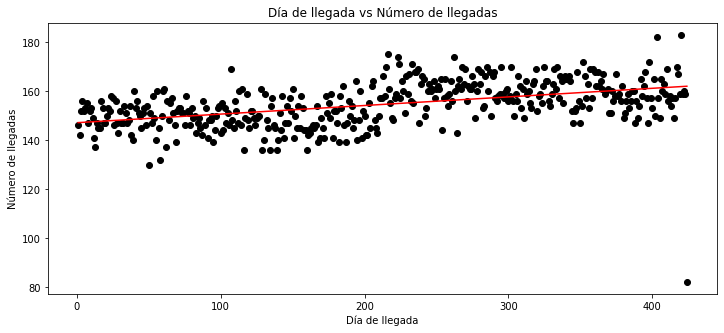

In [49]:
plt.figure(figsize=(12,5))
plt.scatter(X, y, color = 'black')
plt.plot(X, regressor.predict(X), color = 'red')
plt.title('Día de llegada vs Número de llegadas')
plt.xlabel('Día de llegada')
plt.ylabel('Número de llegadas')
plt.show()

Como se puede ver de la Figura, el ajuste explica la tendencia al alza de las llegadas de los pacientes, sin embargo, usted puede preguntarse ¿qué tan bueno es el ajuste de mi modelo? Para esto se puede utilizar el comando score() .

In [50]:
print(regressor.score(X, y))

0.21256677468053498


Lo anterior nos muestra que tan bien ajusta el modelo, en este caso el coeficiente R2. Mientras más cercano a 1, mejor es la regresión. Lo anterior se traduce en que la regresión generada no sea la mejor, sin embargo, considera más información que las estimaciones realizadas mediante los métodos anteriores. Finalmente, se estiman las llegadas de los pacientes para el día 424 utilizando los métodos ingenuo, media simple y media móvil para compararlos con la estimación obtenida con la regresión. 

**Llegadas estimadas mediante el método ingenuo**

In [51]:
last = Llegadas_GRD["Número de llegada"].tail(1)[423]
print(f"Llegadas estimadas para el día 424: {last}")

Llegadas estimadas para el día 424: 82


**Llegadas estimadas mediante el método de media simple**

In [52]:
mean = np.round(Llegadas_GRD["Número de llegada"].mean(),0)
print(f"Llegadas estimadas para el día 424: {mean}")

Llegadas estimadas para el día 424: 155.0


**Llegadas estimadas mediante el método de media móvil**

In [53]:
media_movil = Llegadas_GRD.tail(200)
print(f"Llegadas estimadas para el día 424: {np.round(media_movil.mean()[1],0)}")

Llegadas estimadas para el día 424: 160.0


**Llegadas estimadas mediante regresión**

In [54]:
prox_llegada = 424*regressor.coef_[0][0]+regressor.intercept_[0]
print(f"Llegadas estimadas para el día 424: {np.round(prox_llegada,0)}")

Llegadas estimadas para el día 424: 162.0


De lo anterior, se puede ver que las estimaciones son bastante distintas. La regresión considera la tendencia al alza de los datos, pero asume comportamiento lineal, sin embargo, al considerar la tendencia al alza esta estimación puede ser más cercana a la realidad que el resto de los métodos. 

**Pregunta 1**

Si definimos el error de un pronóstico como la suma de las diferencias entre el valor real y el pronosticado. Utilizando esta definición, indique cuál de las siguientes alternativas corresponde al error del pronóstico de para los últimos 5 días (del día 420 al 424)

In [55]:
pregunta1 = Llegadas_GRD.tail(5)
pregunta1 = pregunta1.rename(columns={"Día de llegada": "Día", "Número de llegada": "Llegadas"})
pregunta1["Regresión"] = pregunta1.apply(lambda row: np.round(147.09 + row.Día*0.035,1), axis = 1)
pregunta1["Error"] = pregunta1.apply(lambda row: row.Llegadas-row.Regresión, axis = 1)
pregunta1

,Día,Llegadas,Regresión,Error
419,420,183,161.8,21.2
420,421,159,161.8,-2.8
421,422,160,161.9,-1.9
422,423,159,161.9,-2.9
423,424,82,161.9,-79.9


In [56]:
np.round(pregunta1["Error"].sum(),0)

-66.0

**Pregunta 2**

Bajo la misma definición de error utilizado en la Pregunta 1, indique cuál de los métodos tiene el menor error de pronóstico para los últimos 5 días (del día 420 al 424)

In [57]:
pregunta2 = Llegadas_GRD.tail(5)
pregunta2 = pregunta2.rename(columns={"Día de llegada": "Día", "Número de llegada": "Llegadas"})
pregunta2["Ingenuo"] = [159,183,159,160,159] 
pregunta2["MS"] = [np.round(Llegadas_GRD["Número de llegada"].mean(),1) for i in range(0,5)]
pregunta2["MM"] = [np.round(Llegadas_GRD["Número de llegada"].iloc[200:418+i].mean(),1) for i in range(0,5)]
pregunta2["Regresión"] = pregunta2.apply(lambda row: np.round(147.09 + row.Día*0.035,1), axis = 1)
pregunta2["Error_1"] = pregunta2.apply(lambda row: row.Llegadas-row.Ingenuo, axis = 1)
pregunta2["Error_2"] = pregunta2.apply(lambda row: row.Llegadas-row.MS, axis = 1)
pregunta2["Error_3"] = pregunta2.apply(lambda row: row.Llegadas-row.MM, axis = 1)
pregunta2["Error_4"] = pregunta2.apply(lambda row: row.Llegadas-row.Regresión, axis = 1)
pregunta2

,Día,Llegadas,Ingenuo,MS,MM,Regresión,Error_1,Error_2,Error_3,Error_4
419,420,183,159,154.6,159.7,161.8,24.0,28.4,23.3,21.2
420,421,159,183,154.6,159.6,161.8,-24.0,4.4,-0.6,-2.8
421,422,160,159,154.6,159.8,161.9,1.0,5.4,0.2,-1.9
422,423,159,160,154.6,159.8,161.9,-1.0,4.4,-0.8,-2.9
423,424,82,159,154.6,159.8,161.9,-77.0,-72.6,-77.8,-79.9


In [58]:
print("Error método ingenuo:", np.round(pregunta2["Error_1"].sum(),0))

Error método ingenuo: -77.0


In [59]:
print("Error método media simple:", np.round(pregunta2["Error_2"].sum(),0))

Error método media simple: -30.0


In [60]:
print("Error método media móvil:", np.round(pregunta2["Error_3"].sum(),0))

Error método media móvil: -56.0


In [61]:
print("Error regresión:", np.round(pregunta2["Error_4"].sum(),0))

Error regresión: -66.0


### Clase 4: Decisiones bajo certidumbre, riesgo e incertidumbre

1. **Decisiones bajo certidumbre**

Las decisiones bajo certidumbre son todas aquellas que se llevan a cabo bajo condiciones de certeza. Lo anterior se traduce en que el tomador de decisiones posee información exacta, medible y confiable de lo que puede suceder, junto con que conoce el objetivo y las posible consecuencias de cada decisión. 
En estos casos, se sabe con certeza que se necesita y en que se puede traducir cada una de las decisiones a partir de los datos y el análisis de la información que se posea. Por ejemplo, si ustedes fueran parte del grupo de personas que toma las decisiones en el Servicio de Salud y quisieran agregar una cama más al hospital San Juan de Dios, saben con certeza que el resultado sería tener un total de 77 camas críticas y el costo de agregar esa cama sería de 1066 [MM$].


In [62]:
Hosp_sheet[["Nombre Establecimiento", "Total Camas Críticas", "Costo de instalar una cama [MM$]"]].loc[Hosp_sheet["Nombre Establecimiento"]=="Hospital San Juan de Dios"]

,Nombre Establecimiento,Total Camas Críticas,Costo de instalar una cama [MM$]
3,Hospital San Juan de Dios,76,1066


De lo anterior se ve que el hospital `San Juan de Dios` cuanta con un total de 76 camas críticas, por lo que si se agrega una, **el total sería de 77** y la cama extra tendría un costo de **1066 [MM$] 

2. **Decisiones bajo incertidumbre**

Las decisiones bajo incertidumbre son todas aquellas que se llevan a cabo bajo condiciones en que no se presenta certeza sobre los datos o lo que puede suceder. Lo anterior se traduce en que el tomador de decisiones no posee información exacta, medible y confiable de lo que puede suceder, junto con que no conoce las posible consecuencias de cada decisión. Debido a lo anterior, este tipo de decisiones son más complicadas que aquellas que se realizan bajo certidumbre.
En estos casos, el tomador de decisiones debido a la incertidumbre y variabilidad que tiene la información presenta un conocimiento limitado y no puede saber a ciencia cierta en que se puede traducir cada una de las decisiones que pueda tomar. Por ejemplo, si ustedes fueran parte del grupo de personas que toma las decisiones en el Servicio de Salud y se encontrara hoy evaluando si aumentar o no la capacidad para el día de mañana en el Hospital San Juan de Dios, no cuenta con información certera para esto, ya que no sabe con certeza de cuantas personas van a llegar al día siguiente. 
Imagínese que la capacidad del hospital permite atender a 8 personas. Sabiendo esto, podemos estimar la cantidad de pacientes que pueden llegar al día siguiente utilizando el método de la media móvil. Si se utiliza este método se obtiene que llegarían 7 pacientes, lo que se traduce en que podríamos decidir quitar una unidad de capacidad para moverla a otra unidad que lo necesite más. Sin embargo, eso dice el método de la media móvil, pero si utilizamos una regresión nos dice que llegarían 8 pacientes, debiendo mantener la capacidad.

In [63]:
SJD = Info_sheet.loc[Info_sheet["Hospital al que llega"]=="Hospital San Juan de Dios"]
SJD = SJD[["Día de llegada", "Número de llegada"]].groupby("Día de llegada").count()
SJD = SJD.reset_index()
SJD

,Día de llegada,Número de llegada
0,1,4
1,2,8
2,3,2
3,4,10
4,5,6
...,...,...
418,420,8
419,421,8
420,422,4
421,423,8


In [64]:
media_movil = SJD[["Número de llegada"]].tail(10)
print(f"Llegadas estimadas con media móvil: {np.round(media_movil.mean()[0],0)}")

Llegadas estimadas con media móvil: 7.0


In [65]:
X = SJD[["Día de llegada"]]
y = SJD[["Número de llegada"]]
regressor = LinearRegression().fit(X, y)
prox_llegada = 424*regressor.coef_[0][0]+regressor.intercept_[0]
print(f"Llegadas estimadas con regresión: {np.round(prox_llegada,0)}")

Llegadas estimadas con regresión: 8.0


De lo anterior se ve que se presenta incertidumbre en la decisión, ya que no se sabe con certeza que puede pasar y cual puede ser el resultado de nuestra decisión. Por ejemplo si se toma la decisión de sacar una unidad de capacidad y llegan las personas estimadas bajo la regresión, el resultado puede ser muy negativo si esa persona extra llega en un estado grave de salud o leve si esta persona no esta grave. Sin embargo, en cualquier caso, no se sabe que puede pasar con certeza por lo que se puede clasificar como una decisión bajo incertidumbre.  

3. **Riesgo**

El riesgo es la consecuencia de la incertidumbre y las decisiones que se tomaron anteriormente. Se puede definir como la probabilidad de que suceda un evento, impacto o consecuencias adversas. Por ejemplo, imagínese que se encuentra en la situación de si agregar o no una cama crítica más en el hospital San Juan de Dios, el cual cuenta con un total de 76 camas críticas y de esas 69 están utilizadas el día de hoy y seguirán utilizadas el día de mañana. Debido a esto, para tomar la decisión usted debería estimar cuantas personas van a llegar mañana, para lo que podría utilizar distintos métodos, como el método ingenuo, media móvil o una regresión y a partir de esto decidir si agregar o no una cama mas. A continuación, se ven los datos del hospital San Juan de Dios y las estimaciones.

In [66]:
Hosp_sheet[["Nombre Establecimiento", "Total Camas Críticas", "Costo de instalar una cama [MM$]"]].loc[Hosp_sheet["Nombre Establecimiento"]=="Hospital San Juan de Dios"]

,Nombre Establecimiento,Total Camas Críticas,Costo de instalar una cama [MM$]
3,Hospital San Juan de Dios,76,1066


In [67]:
SJD2 = Info_sheet.loc[Info_sheet["Hospital al que llega"]=="Hospital San Juan de Dios"]
SJD2 = SJD2[["Día de llegada", "Número de llegada"]].groupby("Día de llegada").count()
SJD2 = SJD2.reset_index()
SJD2

,Día de llegada,Número de llegada
0,1,4
1,2,8
2,3,2
3,4,10
4,5,6
...,...,...
418,420,8
419,421,8
420,422,4
421,423,8


In [68]:
last = SJD2["Número de llegada"].tail(1)[422]
print(f"Llegadas estimadas para el día 424: {last}")

Llegadas estimadas para el día 424: 1


In [69]:
media_movil = SJD2[["Número de llegada"]].tail(10)
print(f"Llegadas estimadas con media móvil: {np.round(media_movil.mean()[0],0)}")

Llegadas estimadas con media móvil: 7.0


In [70]:
X = SJD2[["Día de llegada"]]
y = SJD2[["Número de llegada"]]
regressor = LinearRegression().fit(X, y)
prox_llegada = 424*regressor.coef_[0][0]+regressor.intercept_[0]
print(f"Llegadas estimadas con regresión: {np.round(prox_llegada,0)}")

Llegadas estimadas con regresión: 8.0


Luego, si nuestras decisión se basara solamente en las estimaciones que se obtienen mediante los primeros dos métodos, no se necesitaría una cama, ya que en el primer caso se utilizarían 70 camas y en el segundo las 76 con las que se cuenta. Sin embargo, si llegaran 8 personas como se estimó con la regresión no podríamos atenderla. 

El riesgo en esta situación depende de la decisión. En caso de agregar la cama y que efectivamente no lleguen más de 7 pacientes, el efecto adverso sería el de haber gastado 1066 [MM$] de manera innecesaria. En el caso de no instalar la cama y que llegaran 8 pacientes, el riesgo sería no poder atender a un paciente que puede llegar en estado crítico. Finalmente, para tomar las decisiones se deben ponderar estos factores para tratar de minimizar los efecto adversos en una situación de incertidumbre.


**Pregunta 1**

En base a la información entregada sobre el Servicio de Salud Metropolitano -en el archivo Datos.xls-, indique cuál o cuáles de las siguientes alternativas corresponde o corresponden a una decisión bajo certidumbre.

1. Determinar la cantidad de camas críticas necesarias para responder a la llegada de pacientes del próximo semestre.
2. Determinar qué hospital de cada servicio de salud debe ser ampliado en 1 cama si se quiere incurrir en el menor costo de instalación total.
3. Determinar qué servicios de salud pueden ser ampliados en 22 camas.
4. Determinar a qué hospital de cada servicio de salud se deben agregar 5 camas para reducir el costo promedio diario de atención de pacientes del mes siguiente a su instalación.

Las alternativas correctas son las (2) y (3). La alternativa (1) es bajo incertidumbre ya que no sabemos cuántos pacientes llegarán el próximo semestre. La alternativa (4) es bajo incertidumbre, ya que no se sabe cuántos pacientes llegarán ni de qué GRD serán el mes siguiente de la instalación de estas camas nuevas. 

La alternativa (2) es correcta porque se puede determinar con la información existente, tal como se muestra en el siguiente código.

In [71]:
SS2 = Hosp_sheet[["Nombre Servicio de Salud", "Costo de instalar una cama [MM$]"]].groupby("Nombre Servicio de Salud").min()
SS2 = SS2.reset_index()
SS2

,Nombre Servicio de Salud,Costo de instalar una cama [MM$]
0,Metropolitano Central ...,1256
1,Metropolitano Norte ...,1407
2,Metropolitano Occidente ...,1066
3,Metropolitano Oriente ...,1056
4,Metropolitano Sur ...,1051
5,Metropolitano Sur Oriente ...,1028


In [72]:
l1 = list(SS2["Costo de instalar una cama [MM$]"])
l2 = list(SS2["Nombre Servicio de Salud"])

In [73]:
Hosp_sheet[["Nombre Servicio de Salud", "Costo de instalar una cama [MM$]","Nombre Establecimiento"]].loc[(Hosp_sheet["Nombre Servicio de Salud"] == l2[0]) & (Hosp_sheet["Costo de instalar una cama [MM$]"] == l1[0])]

,Nombre Servicio de Salud,Costo de instalar una cama [MM$],Nombre Establecimiento
6,Metropolitano Central ...,1256,Hospital de Urgencia Asistencia Pública Dr. Al...


In [74]:
Hosp_sheet[["Nombre Servicio de Salud", "Costo de instalar una cama [MM$]","Nombre Establecimiento"]].loc[(Hosp_sheet["Nombre Servicio de Salud"] == l2[1]) & (Hosp_sheet["Costo de instalar una cama [MM$]"] == l1[1])]

,Nombre Servicio de Salud,Costo de instalar una cama [MM$],Nombre Establecimiento
0,Metropolitano Norte ...,1407,Complejo Hospitalario San José


In [75]:
Hosp_sheet[["Nombre Servicio de Salud", "Costo de instalar una cama [MM$]","Nombre Establecimiento"]].loc[(Hosp_sheet["Nombre Servicio de Salud"] == l2[2]) & (Hosp_sheet["Costo de instalar una cama [MM$]"] == l1[2])]

,Nombre Servicio de Salud,Costo de instalar una cama [MM$],Nombre Establecimiento
3,Metropolitano Occidente ...,1066,Hospital San Juan de Dios


In [76]:
Hosp_sheet[["Nombre Servicio de Salud", "Costo de instalar una cama [MM$]","Nombre Establecimiento"]].loc[(Hosp_sheet["Nombre Servicio de Salud"] == l2[3]) & (Hosp_sheet["Costo de instalar una cama [MM$]"] == l1[3])]

,Nombre Servicio de Salud,Costo de instalar una cama [MM$],Nombre Establecimiento
9,Metropolitano Oriente ...,1056,Hospital Dr. Luis Tisné B.


In [77]:
Hosp_sheet[["Nombre Servicio de Salud", "Costo de instalar una cama [MM$]","Nombre Establecimiento"]].loc[(Hosp_sheet["Nombre Servicio de Salud"] == l2[4]) & (Hosp_sheet["Costo de instalar una cama [MM$]"] == l1[4])]

,Nombre Servicio de Salud,Costo de instalar una cama [MM$],Nombre Establecimiento
16,Metropolitano Sur ...,1051,Hospital Parroquial de San Bernardo


In [78]:
Hosp_sheet[["Nombre Servicio de Salud", "Costo de instalar una cama [MM$]","Nombre Establecimiento"]].loc[(Hosp_sheet["Nombre Servicio de Salud"] == l2[5]) & (Hosp_sheet["Costo de instalar una cama [MM$]"] == l1[5])]

,Nombre Servicio de Salud,Costo de instalar una cama [MM$],Nombre Establecimiento
18,Metropolitano Sur Oriente ...,1028,Hospital Clínico de la Florida


La alternativa (3) es correcta porque se puede determinar con la información existente, tal como se muestra en el siguiente código.

In [79]:
SS3 = Hosp_sheet[["Nombre Servicio de Salud", "Máxima cantidad de camas a aumetar"]].groupby("Nombre Servicio de Salud").sum()
SS3

,Máxima cantidad de camas a aumetar
Nombre Servicio de Salud,
Metropolitano Central,24
Metropolitano Norte,10
Metropolitano Occidente,45
Metropolitano Oriente,43
Metropolitano Sur,48
Metropolitano Sur Oriente,27


Luego, para que se puedan instalar 22 camas, se necesita que sea posible aumentar en 22 o más en ese servicio de salud.

In [80]:
SS3.loc[SS3["Máxima cantidad de camas a aumetar"]>=22]

,Máxima cantidad de camas a aumetar
Nombre Servicio de Salud,
Metropolitano Central,24
Metropolitano Occidente,45
Metropolitano Oriente,43
Metropolitano Sur,48
Metropolitano Sur Oriente,27
